In [ ]:
pip install torch torchvision timm


In [ ]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

# Define transformations for each model
transform_vgg_resnet = transforms.Compose([
    transforms.Resize((224, 224)),  # For VGG-19 and ResNet50V2
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_inception = transforms.Compose([
    transforms.Resize((299, 299)),  # For InceptionV4
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset for each model
cifar10_vgg_resnet = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_vgg_resnet)
cifar10_loader_vgg_resnet = DataLoader(cifar10_vgg_resnet, batch_size=64, shuffle=True)

cifar10_inception = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_inception)
cifar10_loader_inception = DataLoader(cifar10_inception, batch_size=64, shuffle=True)


Files already downloaded and verified
Files already downloaded and verified


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import timm
from torch.utils.data import DataLoader, Subset
import numpy as np

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Initialize VGG-19 model
model = timm.create_model('vgg19', pretrained=True, num_classes=10)
model = model.to(device)
model.eval()

# Define transformations specific to VGG-19
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

# Load CIFAR10 dataset and create a small subset for evaluation
test_dataset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

subset_indices = np.random.choice(len(test_dataset), 100, replace=False)
test_subset = Subset(test_dataset, subset_indices)
test_loader = DataLoader(test_subset, batch_size=16, shuffle=False)

def evaluate_model():
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

# Evaluate the VGG-19 model
print("Evaluating VGG-19 on a smaller subset...")
accuracy = evaluate_model()
print(f'VGG-19 Accuracy on CIFAR-10 subset: {accuracy:.2f}%')


Using device: cpu


model.safetensors:   0%|          | 0.00/575M [00:00<?, ?B/s]

Files already downloaded and verified
Evaluating VGG-19 on a smaller subset...
VGG-19 Accuracy on CIFAR-10 subset: 16.00%


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import timm
from torch.utils.data import DataLoader, Subset
import numpy as np

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Initialize ResNet50V2 model
model = timm.create_model('resnet50d', pretrained=True, num_classes=10)
model = model.to(device)
model.eval()

# Define transformations specific to ResNet50V2
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

# Load CIFAR10 dataset and create a small subset for evaluation
test_dataset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

subset_indices = np.random.choice(len(test_dataset), 100, replace=False)
test_subset = Subset(test_dataset, subset_indices)
test_loader = DataLoader(test_subset, batch_size=16, shuffle=False)

def evaluate_model():
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

# Evaluate the ResNet50V2 model
print("Evaluating ResNet50V2 on a smaller subset...")
accuracy = evaluate_model()
print(f'ResNet50V2 Accuracy on CIFAR-10 subset: {accuracy:.2f}%')


Using device: cpu


model.safetensors:   0%|          | 0.00/103M [00:00<?, ?B/s]

Files already downloaded and verified
Evaluating ResNet50V2 on a smaller subset...
ResNet50V2 Accuracy on CIFAR-10 subset: 10.00%


In [ ]:
import torch
import torchvision
import timm
from torch.utils.data import DataLoader, Subset
import numpy as np

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Load and preprocess CIFAR10 dataset
print("Loading CIFAR10 dataset...")

# Get model specific transforms
model = timm.create_model('inception_v4.tf_in1k', pretrained=True, num_classes=10)
model = model.to(device)
model.eval()

data_config = timm.data.resolve_model_data_config(model)
transform = timm.data.create_transform(**data_config, is_training=False)

# Load a small subset of CIFAR10
test_dataset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

# Use only a subset of the test dataset for evaluation
subset_indices = np.random.choice(len(test_dataset), 100, replace=False)  # Using 100 samples
test_subset = Subset(test_dataset, subset_indices)
test_loader = DataLoader(test_subset, batch_size=16, shuffle=False)

def evaluate_model():
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

# Evaluate the model
print("Evaluating model on a smaller subset...")
accuracy = evaluate_model()
print(f'Accuracy on CIFAR-10 subset: {accuracy:.2f}%')


Using device: cpu
Loading CIFAR10 dataset...
Files already downloaded and verified
Evaluating model on a smaller subset...
Accuracy on CIFAR-10 subset: 16.00%


In [ ]:
!pip install --upgrade pip


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
!pip install pandas matplotlib workalendar


  Using cached lunardate-0.2.2-py3-none-any.whl.metadata (3.6 kB)
  Using cached pyluach-2.2.0-py3-none-any.whl.metadata (4.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 59.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Using cached lunardate-0.2.2-py3-none-any.whl (18 kB)
Using cached pyluach-2.2.0-py3-none-any.whl (25 kB)
  Created wheel for pymeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=732003 sha256=5ab0f0e98d8879ec6988f6edb4199428459fb2f252ee46f0adb87e5fae66307c
  Stored in directory: /root/.cache/pip/wheels/d6/67/78/aa2e8d108639dd23a5e9e72a4fc88bb44f5541894382712f48
Successfully built pymeeus


In [ ]:
!pip install matplotlib==3.3.4


In [ ]:
!pip install timeseries-generator --no-deps


In [ ]:
import timeseries_generator


In [ ]:
!pip show timeseries-generator


Name: timeseries-generator
Version: 0.1.0
Summary: Library for generating time series data
Home-page: https://github.com/Nike-Inc/ts-generator
Author: Zhe Sun, Jaap Langemeijer
Author-email: zhe.sun@nike.com
License: Apache License, v2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: matplotlib, pandas, workalendar
Required-by: 


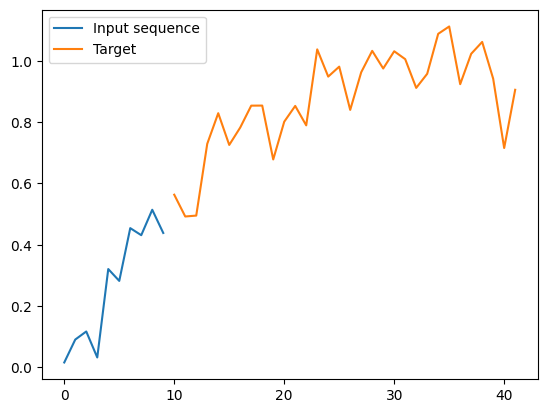

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import numpy as np
import matplotlib.pyplot as plt

# Parameters for synthetic time series
data_length = 1000
time_steps = 10

# Generate synthetic data (e.g., a sine wave with noise)
data = np.sin(np.linspace(0, 50, data_length)) + np.random.normal(scale=0.1, size=data_length)
target = data.copy()  # For a simple prediction task

# Initialize TimeseriesGenerator
generator = TimeseriesGenerator(data, target, length=time_steps, batch_size=32)

# Visualize the first sequence generated
x, y = generator[0]
plt.plot(x[0], label="Input sequence")
plt.plot(range(time_steps, time_steps + len(y)), y, label="Target")
plt.legend()
plt.show()


Training and evaluating LSTM model...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


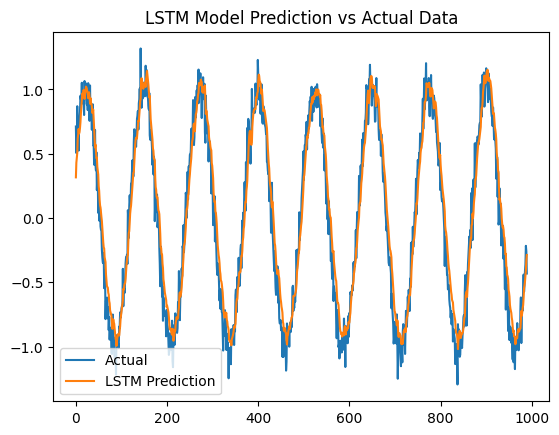

LSTM Model MSE: 0.0259
Training and evaluating GRU model...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


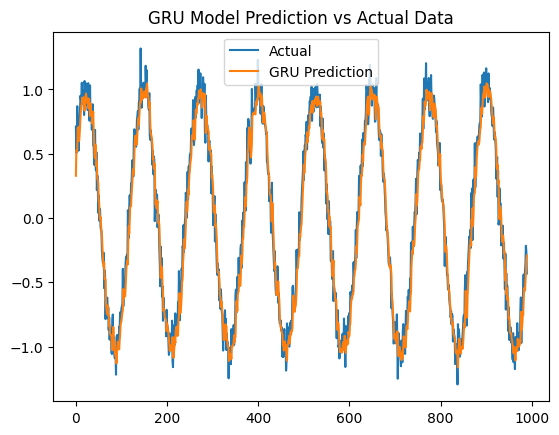

GRU Model MSE: 0.0181
Training and evaluating BiDirectional model...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


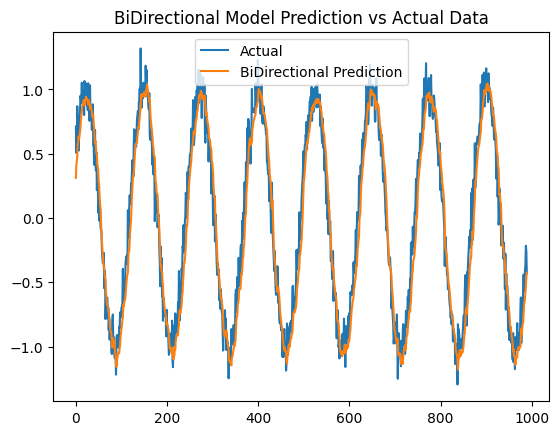

BiDirectional Model MSE: 0.0279
Training and evaluating DeepRNN model...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


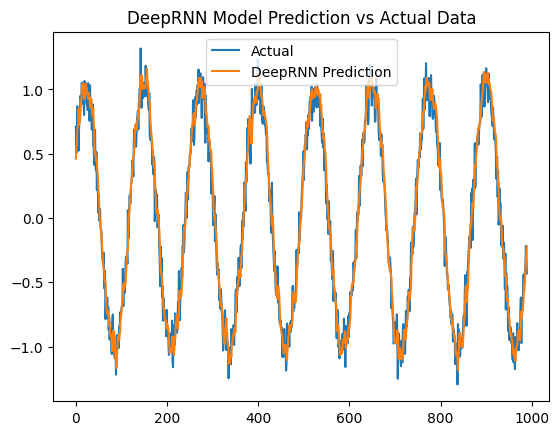

DeepRNN Model MSE: 0.0150


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Bidirectional, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Parameters for synthetic time series
data_length = 1000
time_steps = 10

# Generate synthetic data (e.g., a sine wave with noise)
data = np.sin(np.linspace(0, 50, data_length)) + np.random.normal(scale=0.1, size=data_length)
target = data.copy()

# Initialize TimeseriesGenerator
generator = TimeseriesGenerator(data, target, length=time_steps, batch_size=32)

# Function to build models
def build_model(model_type, input_shape):
    model = Sequential()

    if model_type == "LSTM":
        model.add(LSTM(50, activation='relu', input_shape=input_shape))
    elif model_type == "GRU":
        model.add(GRU(50, activation='relu', input_shape=input_shape))
    elif model_type == "BiDirectional":
        model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=input_shape))
    elif model_type == "DeepRNN":
        model.add(SimpleRNN(50, activation='relu', return_sequences=True, input_shape=input_shape))
        model.add(SimpleRNN(50, activation='relu'))

    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Function to train and evaluate models
def train_and_evaluate(model_type):
    model = build_model(model_type, (time_steps, 1))

    # Reshape data to (samples, time_steps, features) for RNN models
    data_gen = TimeseriesGenerator(data, target, length=time_steps, batch_size=32)

    # Train the model
    model.fit(data_gen, epochs=10, verbose=0)

    # Predictions
    predictions = model.predict(data_gen)
    predictions = predictions.flatten()  # Flatten to 1D array for comparison

    # Calculate MSE
    mse = mean_squared_error(target[time_steps:], predictions)

    # Plot predictions vs actual data
    plt.plot(target[time_steps:], label="Actual")
    plt.plot(predictions, label=f"{model_type} Prediction")
    plt.legend()
    plt.title(f"{model_type} Model Prediction vs Actual Data")
    plt.show()

    print(f"{model_type} Model MSE: {mse:.4f}")

# Run experiments on each model type
for model_type in ["LSTM", "GRU", "BiDirectional", "DeepRNN"]:
    print(f"Training and evaluating {model_type} model...")
    train_and_evaluate(model_type)



--- Experiment with time series length 1000 ---
Training and evaluating LSTM model with scaled data...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


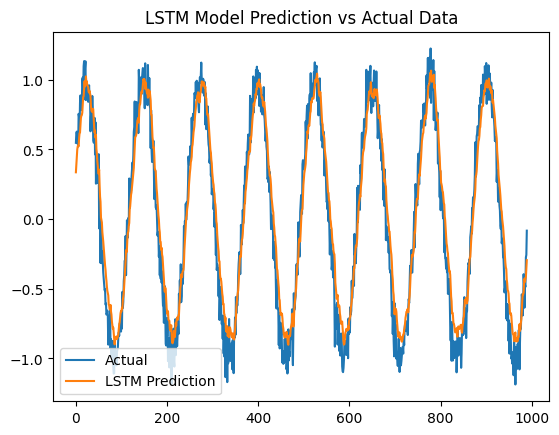

LSTM Model MSE: 0.0281
Training and evaluating GRU model with scaled data...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


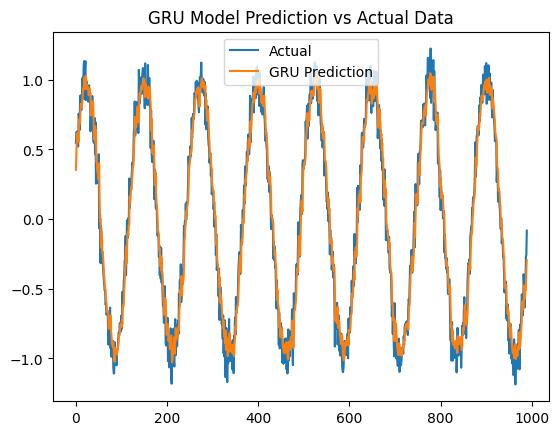

GRU Model MSE: 0.0164
Training and evaluating BiDirectional model with scaled data...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


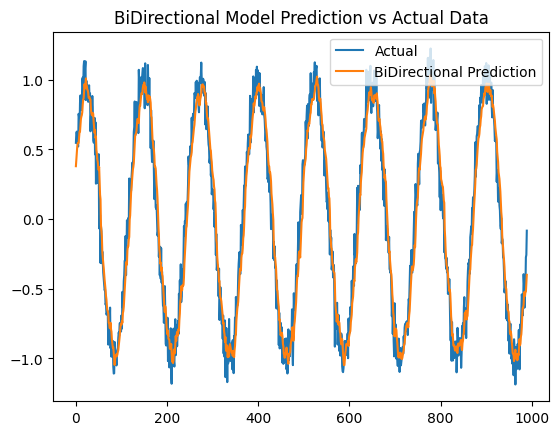

BiDirectional Model MSE: 0.0213
Training and evaluating DeepRNN model with scaled data...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


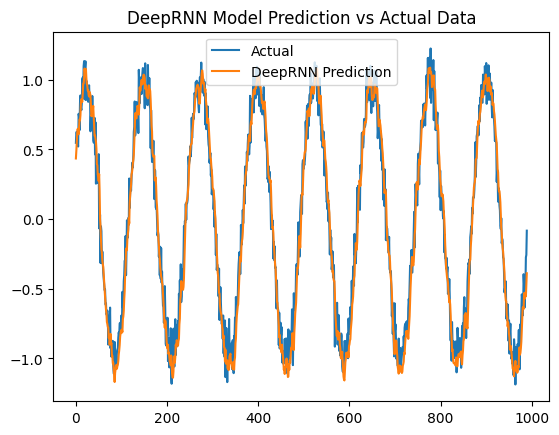

DeepRNN Model MSE: 0.0171

--- Experiment with time series length 2000 ---
Training and evaluating LSTM model with scaled data...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


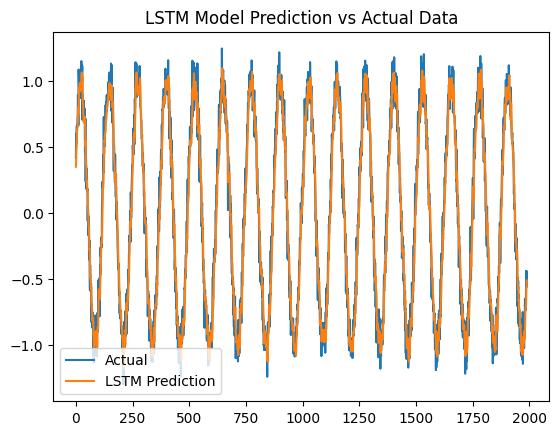

LSTM Model MSE: 0.0168
Training and evaluating GRU model with scaled data...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


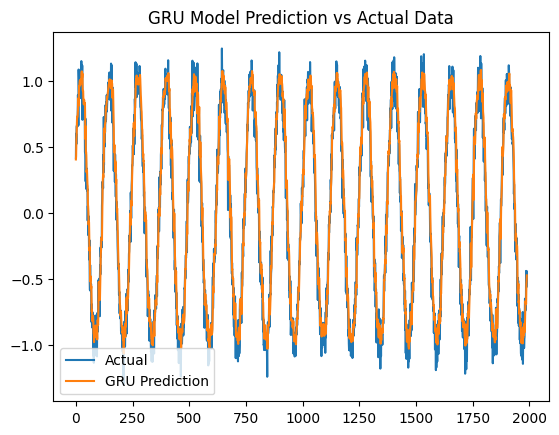

GRU Model MSE: 0.0173
Training and evaluating BiDirectional model with scaled data...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


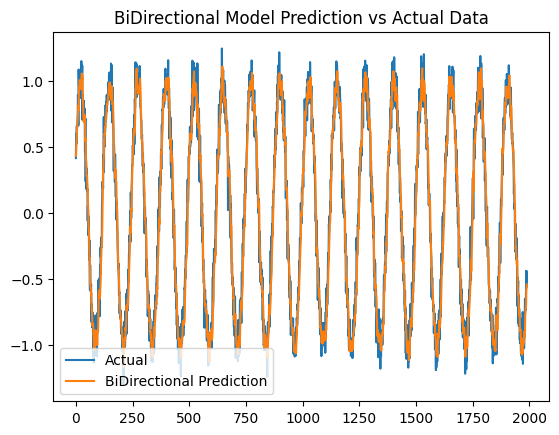

BiDirectional Model MSE: 0.0162
Training and evaluating DeepRNN model with scaled data...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


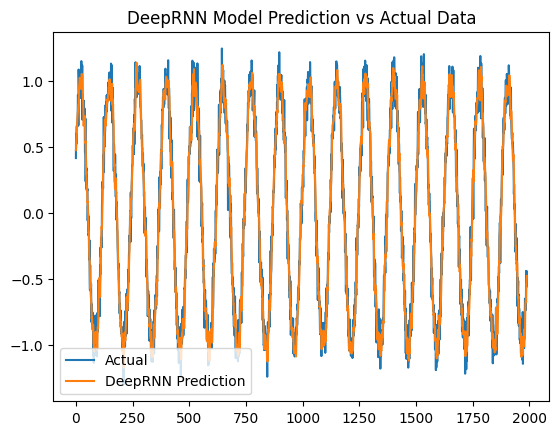

DeepRNN Model MSE: 0.0139

--- Experiment with time series length 3000 ---
Training and evaluating LSTM model with scaled data...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


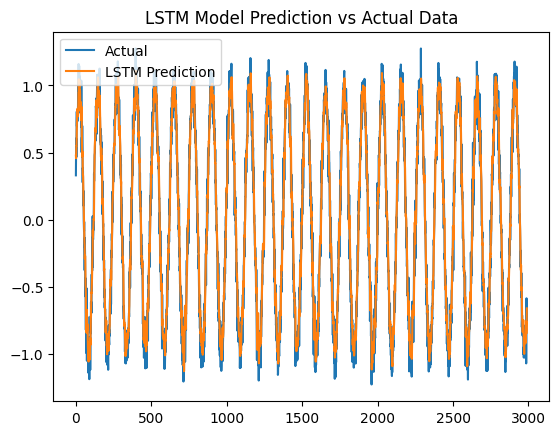

LSTM Model MSE: 0.0149
Training and evaluating GRU model with scaled data...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


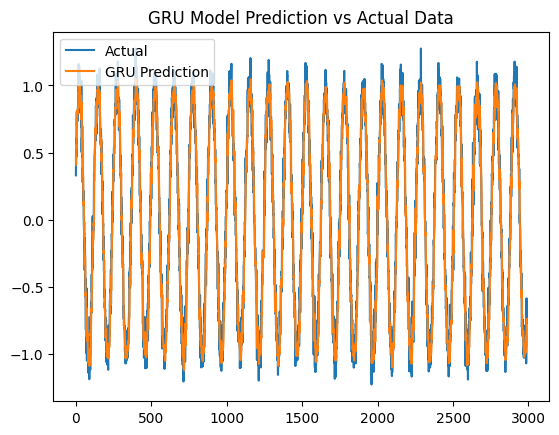

GRU Model MSE: 0.0159
Training and evaluating BiDirectional model with scaled data...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


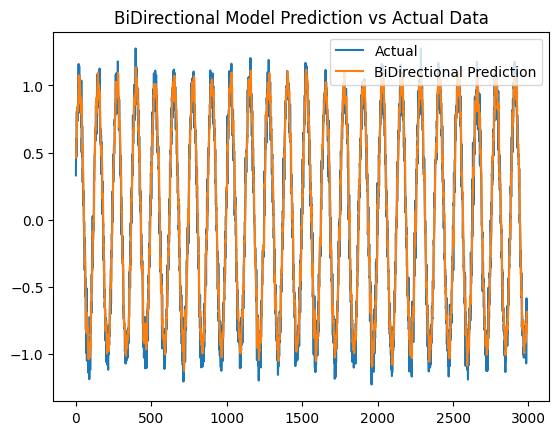

BiDirectional Model MSE: 0.0148
Training and evaluating DeepRNN model with scaled data...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


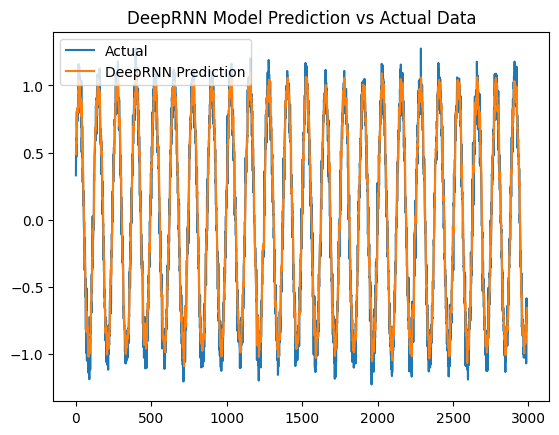

DeepRNN Model MSE: 0.0138


In [ ]:
# Increase time series size and re-run the experiments three times
for scale in [1, 2, 3]:
    scaled_data_length = data_length * scale
    print(f"\n--- Experiment with time series length {scaled_data_length} ---")

    # Regenerate synthetic data
    data = np.sin(np.linspace(0, 50 * scale, scaled_data_length)) + np.random.normal(scale=0.1, size=scaled_data_length)
    target = data.copy()

    for model_type in ["LSTM", "GRU", "BiDirectional", "DeepRNN"]:
        print(f"Training and evaluating {model_type} model with scaled data...")
        train_and_evaluate(model_type)
